# PyBer Data Analysis

## Load files and dependencies

In [130]:
#Add Matplotlib inline magic command
%matplotlib inline

#Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [131]:
#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [132]:
#Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [133]:
#Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Inspect the city data Data Frame

In [134]:
#Get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [135]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [136]:
#Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [137]:
#Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [138]:
#Get the number of data points from the urban cities
sum(city_data_df["type"]=="Urban")

66

In [139]:
#Get the number of data points from the suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [140]:
#Get the number of data points from the rural cities
sum(city_data_df["type"]=="Rural")

18

## Inspect the Ride Data DataFrame

In [141]:
#Get the columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [142]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [143]:
#Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge DataFrames

In [144]:
#Combine the data into a single data frame
pyber_data_df = pd.merge(ride_data_df,city_data_df,on=["city","city"],how = "left")

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Create Scatter/Bubble Chart by City Size

In [145]:
# Create data frames for each type of city

urban_cities_df = pyber_data_df.loc[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df.loc[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df.loc[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [146]:
#Get the number of rides for each city

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [147]:
#Get the average fare for each city

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [148]:
#Get the average number of drivers for each city

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
#rural_avg_driver_count

#of course this data is really already in the city data, and when we are calculating the average here all the numbers going into the averages are the same


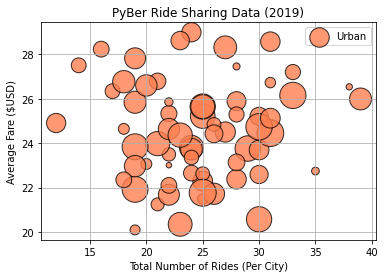

In [149]:
#Urban cities bubble chart

plt.scatter(urban_ride_count,urban_avg_fare,s=[i*10 for i in urban_driver_count],edgecolor = 'k',
            color="coral",linewidth=1,alpha = 0.8,label="Urban")
plt.legend()
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($USD)")
plt.grid(True)

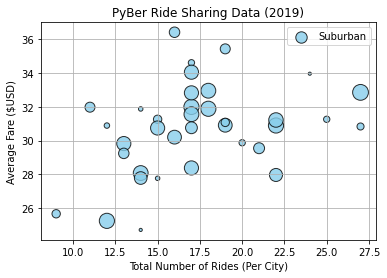

In [150]:
#Suburban cities bubble chart

plt.scatter(suburban_ride_count,suburban_avg_fare,s=[i*10 for i in suburban_driver_count],edgecolor = 'k',
            color="skyblue",linewidth=1,alpha = 0.8,label="Suburban")
plt.legend()
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($USD)")
plt.grid(True)

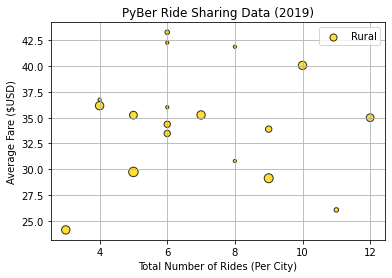

In [151]:
#Rural cities bubble chart

plt.scatter(rural_ride_count,rural_avg_fare,s=[i*10 for i in rural_driver_count],edgecolor = 'k',
            color="gold",linewidth=1,alpha = 0.8,label="Rural")
plt.legend()
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($USD)")
plt.grid(True)

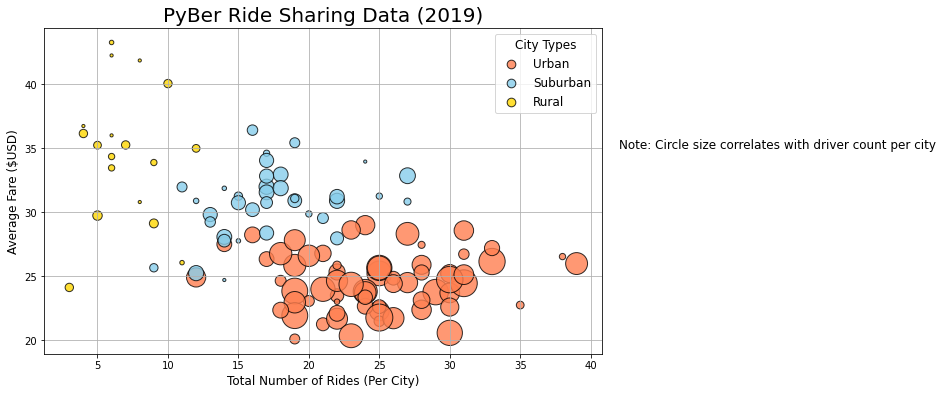

In [152]:
#Add the scatter charts for each type of city
plt.subplots(figsize=(10,6))

#Urban cities bubble chart
plt.scatter(urban_ride_count,urban_avg_fare,s=[i*10 for i in urban_driver_count],edgecolor = 'k',
            color="coral",linewidth=1,alpha = 0.8,label="Urban")

#Suburban cities bubble chart
plt.scatter(suburban_ride_count,suburban_avg_fare,s=[i*10 for i in suburban_driver_count],edgecolor = 'k',
            color="skyblue",linewidth=1,alpha = 0.8,label="Suburban")

#Rural cities bubble chart
plt.scatter(rural_ride_count,rural_avg_fare,s=[i*10 for i in rural_driver_count],edgecolor = 'k',
            color="gold",linewidth=1,alpha = 0.8,label="Rural")

#Incorporate other graph properties
plt.title("PyBer Ride Sharing Data (2019)",fontsize=20)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.ylabel("Average Fare ($USD)",fontsize=12)
plt.grid(True)
plt.legend()

#Create the legend
lgnd = plt.legend(fontsize = "12",mode = "Expanded",
                 scatterpoints=1, loc = "best",title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city",fontsize=12)

#Save the figure
plt.savefig("analysis/Fig1.png")

#Show the plot
plt.show()

## Summary Statistics

In [153]:
#Use describe to get some statistics for each city size

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [154]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [155]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [156]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [157]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [158]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [159]:
#Use Pandas to get the mean ride count for each size of city
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [160]:
#Use Pandas to get the median ride count for each size of city
urban_ride_count.median(),suburban_ride_count.median(),rural_ride_count.median()

(24.0, 17.0, 6.0)

In [161]:
#Use Pandas to get the mode ride count for each type of city
urban_ride_count.mode(),suburban_ride_count.mode(),rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [162]:
#Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats
import statistics

In [163]:
#Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban cities is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban cities is {median_urban_ride_count}.")

mode_urban_ride_count = scipy.stats.mode(urban_ride_count)
#mode_urban_ride_count
print(f"The mode for the ride counts for urban cities is {mode_urban_ride_count}.")


The mean for the ride counts for urban cities is 24.62.
The median for the ride counts for urban cities is 24.0.
The mode for the ride counts for urban cities is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [164]:
#Calculate the measures of central tendency for the ride count for the suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban cities is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban cities is {median_suburban_ride_count}.")

mode_suburban_ride_count = scipy.stats.mode(suburban_ride_count)
#mode_suburban_ride_count
print(f"The mode for the ride counts for suburban cities is {mode_suburban_ride_count}.")


The mean for the ride counts for suburban cities is 17.36.
The median for the ride counts for suburban cities is 17.0.
The mode for the ride counts for suburban cities is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [166]:
#Calculate the measures of central tendency for the ride count for the rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural cities is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural cities is {median_rural_ride_count}.")

mode_rural_ride_count = scipy.stats.mode(rural_ride_count)
#mode_rural_ride_count
print(f"The mode for the ride counts for rural cities is {mode_rural_ride_count}.")


The mean for the ride counts for rural cities is 6.94.
The median for the ride counts for rural cities is 6.0.
The mode for the ride counts for rural cities is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [172]:
#Get the fares for each city type
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [173]:
#Calculate the measures of central tendency for the fares for the urban cities
mean_urban_fare = np.mean(urban_fares)
print(f"The mean for the fares for urban cities is ${mean_urban_fare:.2f}.")

median_urban_fare = np.median(urban_fares)
print(f"The median for the fares for urban cities is ${median_urban_fare:.2f}.")

mode_urban_fare = scipy.stats.mode(urban_fares)
print(f"The mode for the fares for urban cities is {mode_urban_fare}.")


The mean for the fares for urban cities is $24.53.
The median for the fares for urban cities is $24.64.
The mode for the fares for urban cities is ModeResult(mode=array([22.86]), count=array([5])).


In [174]:
#Calculate the measures of central tendency for the fares for the suburban cities
mean_suburban_fare = np.mean(suburban_fares)
print(f"The mean for the fares for suburban cities is ${mean_suburban_fare:.2f}.")

median_suburban_fare = np.median(suburban_fares)
print(f"The median for the fares for suburban cities is ${median_suburban_fare:.2f}.")

mode_suburban_fare = scipy.stats.mode(suburban_fares)
print(f"The mode for the fares for suburban cities is {mode_suburban_fare}.")


The mean for the fares for suburban cities is $30.97.
The median for the fares for suburban cities is $30.75.
The mode for the fares for suburban cities is ModeResult(mode=array([17.99]), count=array([3])).


In [175]:
#Calculate the measures of central tendency for the fares for the rural cities
mean_rural_fare = np.mean(rural_fares)
print(f"The mean for the fares for rural cities is ${mean_rural_fare:.2f}.")

median_rural_fare = np.median(rural_fares)
print(f"The median for the fares for rural cities is ${median_rural_fare:.2f}.")

mode_rural_fare = scipy.stats.mode(rural_fares)
print(f"The mode for the fares for rural cities is {mode_rural_fare}.")


The mean for the fares for rural cities is $34.62.
The median for the fares for rural cities is $37.05.
The mode for the fares for rural cities is ModeResult(mode=array([37.05]), count=array([2])).


## Summary Statistics for Number of Drivers by City Type

In [177]:
#Get the driver count data from the each kind of city
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [179]:
#Calculate the measures of central tendency for the number of drivers for the urban cities
mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean for the number of drivers for urban cities is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median for the number of drivers for urban cities is {median_urban_driver_count:.2f}.")

mode_urban_driver_count = scipy.stats.mode(urban_drivers)
print(f"The mode for the number of drivers for urban cities is {mode_urban_driver_count}.")


The mean for the number of drivers for urban cities is 36.68.
The median for the number of drivers for urban cities is 37.00.
The mode for the number of drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [180]:
#Calculate the measures of central tendency for the number of drivers for the suburban cities
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean for the number of drivers for suburban cities is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median for the number of drivers for suburban cities is {median_suburban_driver_count:.2f}.")

mode_suburban_driver_count = scipy.stats.mode(suburban_drivers)
print(f"The mode for the number of drivers for suburban cities is {mode_suburban_driver_count}.")


The mean for the number of drivers for suburban cities is 13.71.
The median for the number of drivers for suburban cities is 16.00.
The mode for the number of drivers for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [184]:
#Calculate the measures of central tendency for the number of drivers for the rural cities
mean_rural_driver_count = np.mean(rural_drivers)
print(f"The mean for the number of drivers for rural cities is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_drivers)
print(f"The median for the number of drivers for rural cities is {median_rural_driver_count:.2f}.")

mode_rural_driver_count = scipy.stats.mode(rural_drivers)
print(f"The mode for the number of drivers for rural cities is {mode_rural_driver_count}.")


The mean for the number of drivers for rural cities is 4.30.
The median for the number of drivers for rural cities is 4.00.
The mode for the number of drivers for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


## Box and Whisker Plot for Rider Data

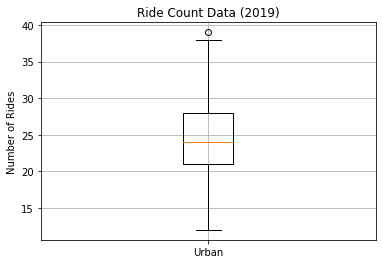

In [190]:
#Create a box and whisker plot for the urban cities ride count

x_labels = ["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

#Add a title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.grid()
plt.show()
           
           


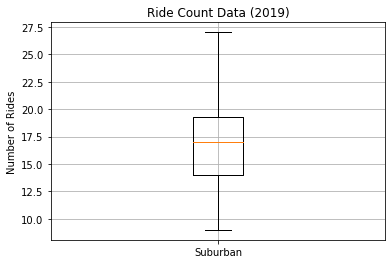

In [191]:
#Create a box and whisker plot for the suburban cities ride count

x_labels = ["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

#Add a title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.grid()
plt.show()
           
           


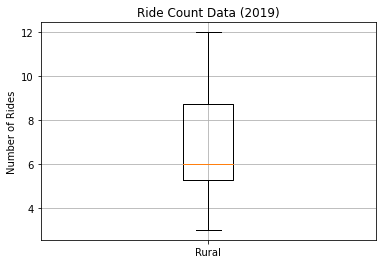

In [192]:
#Create a box and whisker plot for the rural cities ride count

x_labels = ["Rural"]
fig, ax= plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

#Add a title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.grid()
plt.show()
           
           


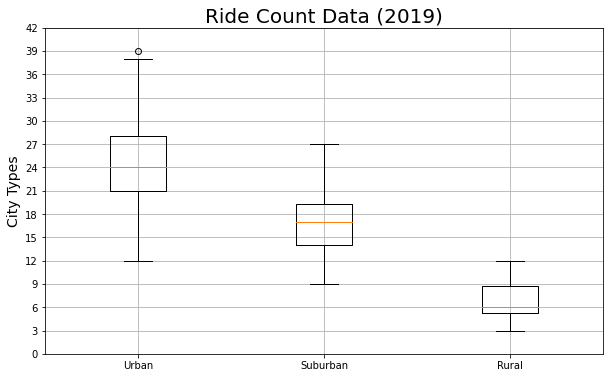

In [194]:
#Add all box and whisker plots to the same graph
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count,suburban_ride_count,rural_ride_count]
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Ride Count Data (2019)",fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_ylabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
#save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [197]:
#Get the city that matches 39 rides

urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Box and Whisker Plots for Ride Fare Data

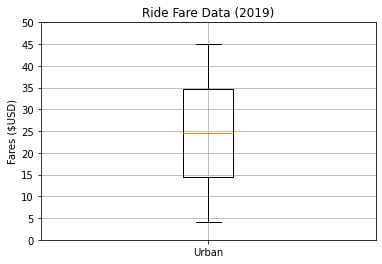

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [199]:
#Create a box and whisker plot for the urban cities ride fare

x_labels = ["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

#Add a title, y-axis label, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()
           


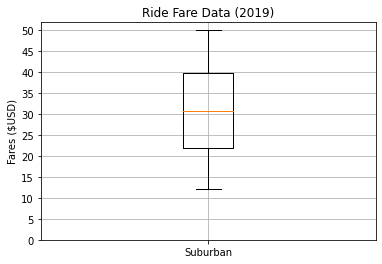

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [200]:
#Create a box and whisker plot for the suburban cities ride fare

x_labels = ["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)

#Add a title, y-axis label, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()
           


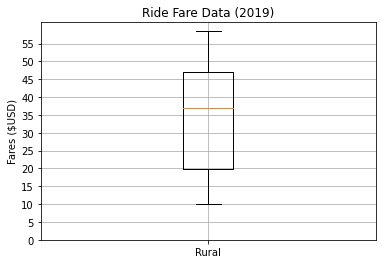

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [207]:
#Create a box and whisker plot for the rural cities ride fare

x_labels = ["Rural"]
fig, ax= plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)

#Add a title, y-axis label, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares ($USD)")
ax.set_yticks(np.arange(0,60,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()
           


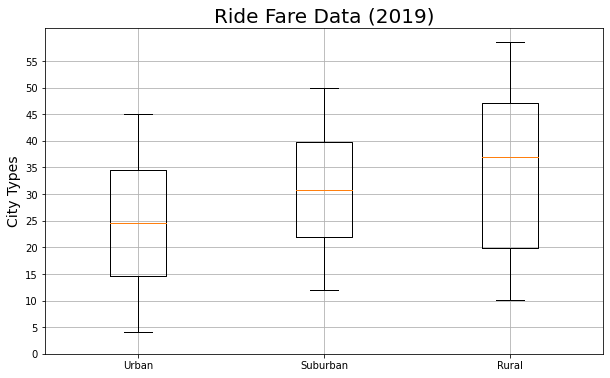

In [209]:
#Add all box and whisker plots to the same graph
x_labels = ["Urban","Suburban","Rural"]
fare_data = [urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Ride Fare Data (2019)",fontsize=20)
ax.set_ylabel("Fares ($USD)",fontsize=14)
ax.set_ylabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,60,step=5.0))
ax.grid()
#save the figure
plt.savefig("analysis/Fig3.png")
plt.show()

## Box and Whisker Charts for Driver Count Data

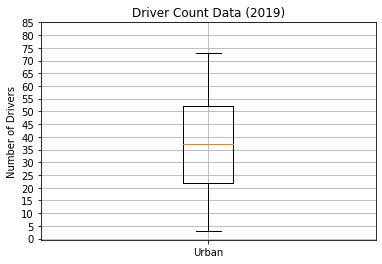

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [214]:
#Create a box and whisker plot for the urban driver counts

x_labels = ["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

#Add a title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()
           


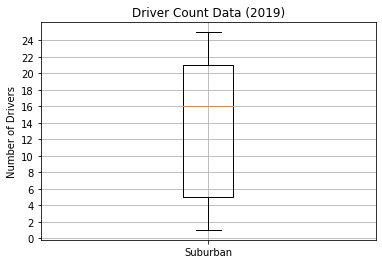

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [221]:
#Create a box and whisker plot for the suburban driver counts

x_labels = ["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_drivers, labels = x_labels)

#Add a title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,25,step=2))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()
           


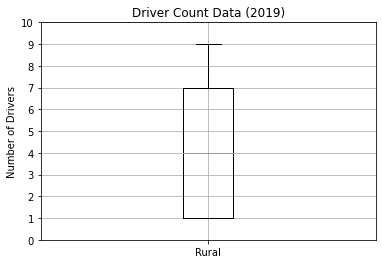

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [219]:
#Create a box and whisker plot for the rural driver counts

x_labels = ["Rural"]
fig, ax= plt.subplots()
ax.boxplot(rural_drivers, labels = x_labels)

#Add a title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,11))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()
           


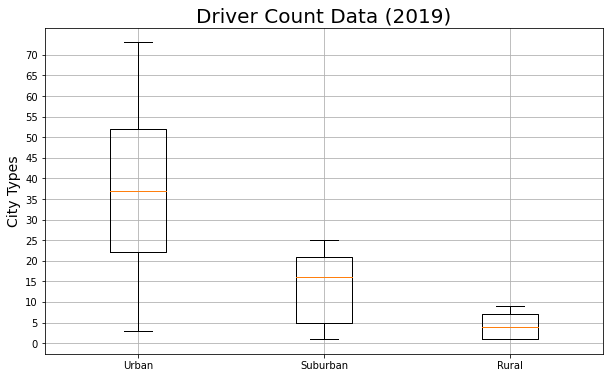

In [223]:
#Add all box and whisker plots to the same graph
x_labels = ["Urban","Suburban","Rural"]
drivers_data = [urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Driver Count Data (2019)",fontsize=20)
ax.set_ylabel("Number of Drivers)",fontsize=14)
ax.set_ylabel("City Types",fontsize=14)
ax.boxplot(drivers_data, labels=x_labels)
ax.set_yticks(np.arange(0,75,step=5.0))
ax.grid()
#save the figure
plt.savefig("analysis/Fig3.png")
plt.show()